# Import Libraries

In [1]:
#libraries
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import numpy as np  

# Import Data

In [2]:
(X_train, Y_train) , (X_test, Y_test) = datasets.mnist.load_data()

# Filter Required Data

In [3]:
trainLen = len(X_train)
trainLen

60000

In [4]:
testLen = len(X_test)
testLen

10000

In [5]:
x_train_dat = []
y_train_dat = []

In [6]:
x_test_dat = []
y_test_dat = []

In [7]:
for i in range(0, trainLen):
    if Y_train[i] == 4 or Y_train[i] == 9:
        x_train_dat.append(X_train[i])
        y_train_dat.append(Y_train[i])

In [8]:
for i in range(0, testLen):
    if Y_test[i] == 4 or Y_test[i] == 9:
        x_test_dat.append(X_test[i])
        y_test_dat.append(Y_test[i])

# Data Preprocessing

In [9]:
def encode_it(data_lst):
    label_encoder = LabelEncoder()
    encode = label_encoder.fit_transform(data_lst)
    encoded_data = keras.utils.to_categorical(encode)
    return encoded_data

## Open Data

In [10]:
x_train_data = np.array(x_train_dat)
y_train_data = [str(x) for x in y_train_dat]

In [11]:
x_test_data = np.array(x_test_dat)
y_test_data = [str(x) for x in y_test_dat]

In [12]:
len(x_train_data)

11791

In [13]:
len(x_test_data)

1991

In [14]:
x_train_data.shape

(11791, 28, 28)

In [15]:
x_test_data.shape

(1991, 28, 28)

In [16]:
x_train_data_new = x_train_data.reshape(list(x_train_data.shape) + [1])

In [17]:
x_test_data_new = x_test_data.reshape(list(x_test_data.shape) + [1])

In [18]:
x_train_data_new.shape

(11791, 28, 28, 1)

In [19]:
x_test_data_new.shape

(1991, 28, 28, 1)

In [20]:
y_train_data = encode_it(y_train_data)

In [21]:
y_test_data = encode_it(y_test_data)

In [22]:
y_train_data

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [23]:
y_test_data

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [24]:
x_proper_train = x_train_data_new[:600]

In [25]:
x_proper_train.shape

(600, 28, 28, 1)

In [26]:
y_proper_train = y_train_data[:600]

In [27]:
y_proper_train.shape

(600, 2)

In [28]:
x_calibrate = x_train_data_new[600:1000]

In [29]:
x_calibrate.shape

(400, 28, 28, 1)

In [30]:
y_calibrate = y_train_data[600:1000]

In [31]:
y_calibrate.shape

(400, 2)

## Hidden Data

In [32]:
pi = [None]*1000

In [33]:
label_index_4A = [0, 4, 14, 17, 20, 21, 23, 36, 42, 44, 45, 48, 50, 54, 59, 61, 70, 76, 114, 117, 127, 128, 145, 148, 152, 155, 166, 172, 185, 190, 205, 207, 208, 240, 241, 243, 277, 288, 293, 301, 302, 305, 322, 328, 342, 347, 350, 358, 370, 376, 378, 388, 394, 405, 407, 408, 409, 412, 420, 434, 457, 465, 468, 469, 471, 472, 476, 480, 488, 492, 498, 503, 505, 508, 509, 510, 511, 512, 513, 519, 521, 522, 527, 529, 530, 531, 534, 543, 564, 565, 566, 570, 577, 584, 586, 587, 589, 590, 592, 595, 596, 599, 605, 614, 619, 624, 629, 634, 637, 640, 643, 655, 661, 662, 664, 678, 688, 697, 702, 706, 709, 712, 713, 714, 716, 717, 718, 719, 720, 722, 723, 726, 728, 738, 741, 747, 749, 750, 753, 761, 764, 820, 832, 869, 870, 871, 879, 881, 883, 884, 887, 893, 897, 921, 924, 925, 934, 937, 946, 953, 971, 995]
for i in label_index_4A:
    pi[i] = '4a'

In [34]:
label_index_4B = [2, 6, 11, 15, 16, 25, 26, 28, 29, 34, 35, 53, 55, 60, 62, 65, 68, 71, 72, 78, 80, 81, 82, 84, 85, 88, 90, 91, 98, 100, 102, 104, 111, 112, 116, 120, 126, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 147, 150, 154, 156, 164, 173, 174, 175, 176, 177, 178, 179, 181, 182, 184, 186, 189, 191, 195, 197, 198, 201, 202, 203, 204, 210, 212, 214, 218, 219, 222, 223, 225, 229, 233, 234, 236, 237, 245, 246, 248, 249, 250, 251, 252, 253, 255, 256, 258, 260, 262, 263, 264, 266, 268, 269, 280, 286, 287, 295, 298, 299, 306, 309, 310, 311, 312, 315, 316, 319, 320, 321, 327, 331, 338, 343, 345, 347, 348, 351, 352, 356, 357, 361, 367, 367, 374, 375, 377, 380, 384, 387, 389, 390, 392, 399, 403, 417, 419, 421, 423, 424, 426, 427, 429, 430, 432, 433, 436, 437, 439, 441, 442, 445, 449, 450, 451, 452, 453, 454, 455, 461, 463, 466, 467, 473, 477, 479, 481, 484, 486, 490, 493, 499, 502, 504, 515, 536, 537, 539, 541, 550, 552, 553, 559, 561, 563, 569, 578, 579, 581, 582, 588, 594, 597, 602, 606, 608, 610, 613, 618, 620, 622, 625, 628, 630, 636, 641, 644, 646, 647, 649, 653, 654, 659, 663, 667, 669, 670, 673, 674, 679, 681, 689, 692, 727, 729, 739, 746, 751, 756, 760, 763, 767, 769, 770, 771, 772, 773, 774, 778, 780, 784, 790, 795, 796, 799, 800, 803, 804, 806, 807, 813, 815, 818, 822, 824, 831, 835, 839, 841, 846, 848, 849, 850, 851, 856, 858, 859, 860, 861, 864, 865, 866, 867, 868, 876, 877, 886, 888, 901, 906, 908, 910, 911, 912, 913, 914, 916, 917, 919, 927, 929, 931, 933, 936, 940, 943, 946, 950, 951, 952, 956, 957, 958, 958, 967, 968, 970, 972, 973, 976, 977, 978, 981, 983, 985, 987, 988, 989, 990, 991, 993, 998]
for i in label_index_4B:
    pi[i] = '4b'

In [35]:
label_index_4C = [30, 92, 122, 221, 324, 332, 335, 360, 382, 383, 489, 501, 518, 523, 693, 793, 814, 918, 942, 982]
for i in label_index_4C:
    pi[i] = '4c'

In [36]:
label_index_9B = [3, 8, 9, 10, 33, 41, 43, 74, 158, 199, 228, 267, 270, 281, 284, 285, 353, 730, 732, 745, 775, 863, 874, 969, 986, 996]
for i in label_index_9B:
    pi[i] = '9b'

In [37]:
for i in range(0, 1000):
    if pi[i] == None:
        pi[i] = '9a'

In [38]:
priv_info = encode_it(pi)

In [39]:
priv_info   

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [40]:
num = 1000
images = x_train_data_new
labels = list(range(0,1001))

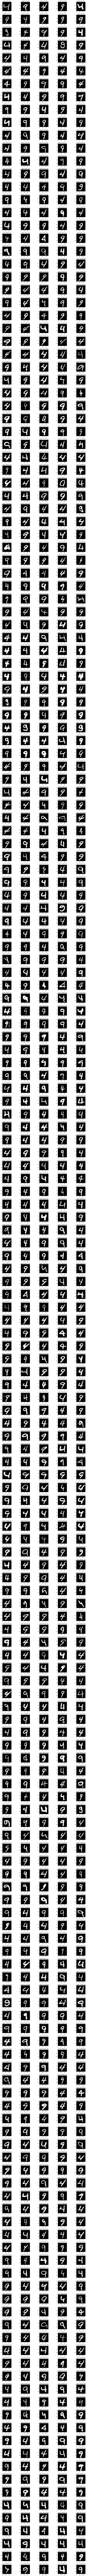

In [41]:
num_row = 200
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: [{}],{},{}'.format(labels[i], np.argmax(y_train_data[i]), pi[i]))
plt.tight_layout()
plt.show()

# Visualising Individual Data

In [42]:
def show_num_img(img_name, img_index):
    plt.figure()
    plt.imshow(img_name[img_index]) 
    plt.title(pi[img_index])
    plt.show()

Encoder Label:  4


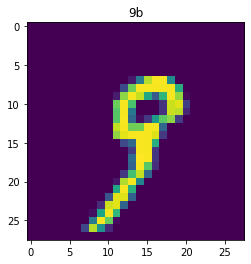

In [43]:
tn = 3
print("Encoder Label: ", np.argmax(priv_info[tn]))
show_num_img(x_proper_train, tn)

# Neural Network

In [44]:
class myNN():
    def __init__(self, output_size):
        # Create CNN  model
        self.model = models.Sequential([
               layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
                layers.MaxPooling2D((2, 2)),
                
                layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                
                layers.Flatten(),
                layers.Dense(64, activation='relu'),
                layers.Dense(output_size, activation='softmax')
        ])
        # Create class variables
        self.confidence_y = []
        self.confidence_h = []
        self.credibility_y = []
        self.credibility_h = []
        self.ncm_y = []
        self.ncm_h = []
        self.pVal_y = []
        self.pVal_h = []
    
    def train_model(self, x, y, ep):
        # Train the model defined
        op = Adam(learning_rate = 0.01)
        self.model.compile(optimizer = op, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        self.model.fit(x, y, epochs = ep)
        return print("Model Trained !")
    
    def eval_model(self, x_eval, y_eval):
        # Evaluate defined model
        print("Model Evaluation: \n")
        return self.model.evaluate(x_eval, y_eval)
    
    def pred_model(self, x_test):
        # Predict with the defined model
       y_test = self.model.predict(x_test)
       return y_test
   
    def calc_ncs(self, y_predicted, y_actual):
        # Calculate the nonconformity score
        x = []
        Yu = np.argmax(y_actual)
        Ou = y_predicted[Yu]
        l = len(y_predicted)
        for i in range(0, l):
            if i != Yu:
                t1 = y_predicted[i] - Ou
                #print(t1)
                x.append(t1)
        alpha = max(x)
        #print(alpha)
        return alpha
    
    def calc_pval(self, alpha_cal, alpha_test):
        # Calculate the p-value
        count = 0
        for i in alpha_cal:
            if i >= alpha_test:
                count += 1
        count += 1 
            
        q = len(alpha_cal)
        p_val = count / (q + 1)
        return p_val
            
            
    def calc_score(self, ncmCalc, pValCalc):
        # Calculate the confidence and credibility
        icp_Pred = []
        conf = []
        cred = []
        l = len(ncmCalc)
        for i in range(0,l):
            pred_label = np.argmax(min(ncmCalc[i]))
            icp_Pred.append(pred_label)
            ps = pValCalc[i]
            ps.sort()
            conf.append(1 - ps[-2])
            cred.append(ps[-1])     
        return [conf, cred]
    
    def ICP(self, y_test_pred, y_cal_pred, y_cal_act, class_lst):
        # Inductive conformal prediction
        testLen = len(y_test_pred)
        calLen = len(y_cal_act)
        cLen = len(class_lst)
            
        ncm_cal = []
        for i in range(0, calLen):
            ncm_cal.append(self.calc_ncs(y_cal_pred[i], y_cal_act[i]))
            
        class_lst = keras.utils.to_categorical(class_lst)    
            
        p_vals = []
        ncm_test = []
        for i in range(0, testLen):
            ncm_test_calc = []
            p_u = []
            for j in range(0, cLen):
                ncm_test_calc.append(self.calc_ncs(y_test_pred[i], class_lst[j]))
                p_u.append(self.calc_pval(ncm_cal, ncm_test_calc[j]))
            ncm_test.append(ncm_test_calc)
            p_vals.append(p_u)
        
        return [ncm_test, p_vals]
        
        
    def get_y_labels(self, h_i):
        # Assigning y for training with PI
        y_i = []
        for i in h_i:
            cls = np.argmax(i)
            if cls == 0 or cls == 1 or cls == 2:
                y_i.append('4')
            
            elif cls == 3 or cls == 4:
                y_i.append('9')
                
            else:
                y_i.append(None)
        
        return y_i
    
    def get_h_labels(self, h_i):
        # Assign predicted train priv info
        p_i = []
        for i in h_i:
            cls = np.argmax(i)
            if cls == 0:
                p_i.append('4a')
            
            elif cls == 1:
                p_i.append('4b')
            
            elif cls == 2:
                p_i.append('4c')
                
            elif cls == 3:
                p_i.append('9a')
                
            elif cls == 4:
                p_i.append('9b')
                
            else:
                p_i.append(None)
        #print(p_i)
        return p_i
        
        
    

# Without Privileged Information

In [45]:
nn0 = myNN(2)

In [46]:
nn0.train_model(x_proper_train, y_proper_train, 5)

Epoch 1/5
19/19 [==============================] - 1s 9ms/step - loss: 35.5300 - accuracy: 0.7650
Epoch 2/5
19/19 [==============================] - 0s 11ms/step - loss: 0.1504 - accuracy: 0.9583
Epoch 3/5
19/19 [==============================] - 0s 8ms/step - loss: 0.0622 - accuracy: 0.9833
Epoch 4/5
19/19 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 5/5
19/19 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9967
Model Trained !


In [47]:
nn0.eval_model(x_calibrate, y_calibrate)

Model Evaluation: 

13/13 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9875


[0.03378824144601822, 0.987500011920929]

In [48]:
y_cal_pred_no_pi = nn0.pred_model(x_calibrate)

In [49]:
y_test_pred_no_pi = nn0.pred_model(x_test_data_new)

In [50]:
nn0.ncm_y, nn0.pVal_y = nn0.ICP(y_test_pred_no_pi, y_cal_pred_no_pi, y_calibrate, [0,1])

In [51]:
nn0.confidence_y, nn0.credibility_y = nn0.calc_score(nn0.ncm_y, nn0.pVal_y)

In [52]:
np.mean(nn0.confidence_y)

0.9970315296640367

In [53]:
np.mean(nn0.credibility_y)

0.47109123224084437

# With Privileged Information

In [54]:
def partial_priv(nn, num_pi):
    nn.train_model(x_proper_train[:num_pi], priv_info[:num_pi], 5)
    nn.eval_model(x_proper_train[num_pi:], priv_info[num_pi:600])
    h_pred = nn.pred_model(x_proper_train[num_pi:])
    h_labels = nn.get_h_labels(h_pred)
    new_hpred = [y for x in [pi[:num_pi], h_labels] for y in x]
    new_hpred = encode_it(new_hpred)
    nn.train_model(x_proper_train, new_hpred, 5)
    nn.eval_model(x_calibrate, priv_info[600:])
    h_cal = nn.pred_model(x_calibrate)
    h_test = nn.pred_model(x_test_data_new)
    nn.ncm_h, nn.pVal_h = nn.ICP(h_test, h_cal, priv_info[600:], [0,1,2,3,4])
    nn.confidence_h, nn.credibility_h = nn.calc_score(nn.ncm_h, nn.pVal_h)
    y_cal = nn.get_y_labels(h_cal)
    y_cal = encode_it(y_cal)
    y_test = nn.get_y_labels(h_test)
    y_test = encode_it(y_test)
    nn.ncm_y, nn.pVal_y = nn.ICP(y_test, y_cal, y_calibrate, [0,1])
    nn.confidence_y, nn.credibility_y = nn.calc_score(nn.ncm_y, nn.pVal_y)
    
    
    
    

## 100 Privileged Information

In [55]:
nn1 = myNN(5)

In [56]:
partial_priv(nn1, 100)

Epoch 1/5
4/4 [==============================] - 0s 7ms/step - loss: 150.3883 - accuracy: 0.3300
Epoch 2/5
4/4 [==============================] - 0s 6ms/step - loss: 3.5763 - accuracy: 0.2600
Epoch 3/5
4/4 [==============================] - 0s 7ms/step - loss: 1.1842 - accuracy: 0.5800
Epoch 4/5
4/4 [==============================] - 0s 6ms/step - loss: 0.8413 - accuracy: 0.7400
Epoch 5/5
4/4 [==============================] - 0s 6ms/step - loss: 0.7472 - accuracy: 0.8000
Model Trained !
Model Evaluation: 

16/16 [==============================] - 0s 2ms/step - loss: 1.0977 - accuracy: 0.6120
Epoch 1/5
19/19 [==============================] - 0s 8ms/step - loss: 0.7862 - accuracy: 0.7583
Epoch 2/5
19/19 [==============================] - 0s 9ms/step - loss: 0.5363 - accuracy: 0.7983
Epoch 3/5
19/19 [==============================] - 0s 11ms/step - loss: 0.5205 - accuracy: 0.8233
Epoch 4/5
19/19 [==============================] - 0s 7ms/step - loss: 0.4225 - accuracy: 0.8433
Epoch 5/5
1

In [57]:
np.mean(nn1.confidence_h)

0.8291701685013985

In [58]:
np.mean(nn1.credibility_h)

0.6827080966594062

In [59]:
np.mean(nn1.confidence_y)

0.8254364089775558

In [60]:
np.mean(nn1.credibility_y)

1.0

## 200 Privileged Data

In [61]:
nn2 = myNN(5)

In [62]:
partial_priv(nn2, 200)

Epoch 1/5
7/7 [==============================] - 1s 10ms/step - loss: 87.2063 - accuracy: 0.2250
Epoch 2/5
7/7 [==============================] - 0s 10ms/step - loss: 1.1593 - accuracy: 0.5950
Epoch 3/5
7/7 [==============================] - 0s 9ms/step - loss: 1.0915 - accuracy: 0.5400
Epoch 4/5
7/7 [==============================] - 0s 9ms/step - loss: 0.8198 - accuracy: 0.7150
Epoch 5/5
7/7 [==============================] - 0s 9ms/step - loss: 0.5536 - accuracy: 0.8200
Model Trained !
Model Evaluation: 

13/13 [==============================] - 0s 2ms/step - loss: 0.8558 - accuracy: 0.7075
Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 0.7076 - accuracy: 0.7933
Epoch 2/5
19/19 [==============================] - 0s 15ms/step - loss: 0.5079 - accuracy: 0.8350
Epoch 3/5
19/19 [==============================] - 0s 16ms/step - loss: 0.4462 - accuracy: 0.8567
Epoch 4/5
19/19 [==============================] - 0s 14ms/step - loss: 0.3425 - accuracy: 0.8783
Epoch 5

In [63]:
np.mean(nn2.confidence_h)

0.8535316655623623

In [64]:
np.mean(nn2.credibility_h)

0.5870494532127741

In [65]:
np.mean(nn2.confidence_y)

0.9002493765586035

In [66]:
np.mean(nn2.credibility_y)

1.0

## 300 Privileged Information

In [67]:
nn3 = myNN(5)

In [68]:
partial_priv(nn3, 300)

Epoch 1/5
10/10 [==============================] - 2s 10ms/step - loss: 79.9180 - accuracy: 0.3167
Epoch 2/5
10/10 [==============================] - 0s 10ms/step - loss: 1.0223 - accuracy: 0.6167
Epoch 3/5
10/10 [==============================] - 0s 10ms/step - loss: 0.7656 - accuracy: 0.7533
Epoch 4/5
10/10 [==============================] - 0s 11ms/step - loss: 0.5908 - accuracy: 0.7833
Epoch 5/5
10/10 [==============================] - 0s 10ms/step - loss: 0.5223 - accuracy: 0.8133
Model Trained !
Model Evaluation: 

10/10 [==============================] - 0s 3ms/step - loss: 0.7750 - accuracy: 0.7600
Epoch 1/5
19/19 [==============================] - 1s 10ms/step - loss: 0.5081 - accuracy: 0.8433
Epoch 2/5
19/19 [==============================] - 0s 9ms/step - loss: 0.3732 - accuracy: 0.8650
Epoch 3/5
19/19 [==============================] - 0s 10ms/step - loss: 0.2812 - accuracy: 0.8950
Epoch 4/5
19/19 [==============================] - 0s 9ms/step - loss: 0.2344 - accuracy: 0.9

In [69]:
np.mean(nn3.confidence_h)

0.8971306039271485

In [70]:
np.mean(nn3.credibility_h)

0.5667749260700585

In [71]:
np.mean(nn3.confidence_y)

0.9201995012468827

In [72]:
np.mean(nn3.credibility_y)

1.0

## 400 Privileged Information

In [73]:
nn4 = myNN(5)

In [74]:
partial_priv(nn4, 400)

Epoch 1/5
13/13 [==============================] - 1s 12ms/step - loss: 73.8896 - accuracy: 0.3275
Epoch 2/5
13/13 [==============================] - 0s 16ms/step - loss: 0.9774 - accuracy: 0.6900
Epoch 3/5
13/13 [==============================] - 0s 15ms/step - loss: 0.7103 - accuracy: 0.7350
Epoch 4/5
13/13 [==============================] - 0s 17ms/step - loss: 0.6366 - accuracy: 0.7675
Epoch 5/5
13/13 [==============================] - 0s 15ms/step - loss: 0.5204 - accuracy: 0.8050
Model Trained !
Model Evaluation: 

7/7 [==============================] - 0s 4ms/step - loss: 0.7946 - accuracy: 0.7100
Epoch 1/5
19/19 [==============================] - 1s 10ms/step - loss: 0.7895 - accuracy: 0.7833
Epoch 2/5
19/19 [==============================] - 0s 10ms/step - loss: 0.5225 - accuracy: 0.8183
Epoch 3/5
19/19 [==============================] - 0s 11ms/step - loss: 0.4230 - accuracy: 0.8500
Epoch 4/5
19/19 [==============================] - 0s 10ms/step - loss: 0.4159 - accuracy: 0.8

In [75]:
np.mean(nn4.confidence_h)

0.9324403706955615

In [76]:
np.mean(nn4.credibility_h)

0.5445890547363385

In [77]:
np.mean(nn4.confidence_y)

0.9201995012468827

In [78]:
np.mean(nn4.credibility_y)

1.0

## 500 Privileged Information

In [79]:
nn5 = myNN(5)

In [80]:
partial_priv(nn5, 500)

Epoch 1/5
16/16 [==============================] - 1s 13ms/step - loss: 43.6169 - accuracy: 0.5360
Epoch 2/5
16/16 [==============================] - 0s 14ms/step - loss: 0.7744 - accuracy: 0.7320
Epoch 3/5
16/16 [==============================] - 0s 14ms/step - loss: 0.5286 - accuracy: 0.8000
Epoch 4/5
16/16 [==============================] - 0s 14ms/step - loss: 0.4191 - accuracy: 0.8360
Epoch 5/5
16/16 [==============================] - 0s 10ms/step - loss: 0.3234 - accuracy: 0.8880
Model Trained !
Model Evaluation: 

4/4 [==============================] - 0s 2ms/step - loss: 1.0844 - accuracy: 0.7100
Epoch 1/5
19/19 [==============================] - 1s 10ms/step - loss: 0.5839 - accuracy: 0.7883
Epoch 2/5
19/19 [==============================] - 0s 10ms/step - loss: 0.3673 - accuracy: 0.8667
Epoch 3/5
19/19 [==============================] - 0s 11ms/step - loss: 0.2903 - accuracy: 0.8800
Epoch 4/5
19/19 [==============================] - 0s 12ms/step - loss: 0.2125 - accuracy: 0.9

In [81]:
np.mean(nn5.confidence_h)

0.9373878212555002

In [82]:
np.mean(nn5.credibility_h)

0.5355308363946989

In [83]:
np.mean(nn5.confidence_y)

0.9576059850374068

In [84]:
np.mean(nn5.credibility_y)

1.0

## 600 Privileged Information

In [85]:
nn6 = myNN(5)

In [86]:
nn6.train_model(x_proper_train, priv_info[:600], 5)

Epoch 1/5
19/19 [==============================] - 1s 13ms/step - loss: 33.5577 - accuracy: 0.4033
Epoch 2/5
19/19 [==============================] - 0s 14ms/step - loss: 0.8369 - accuracy: 0.7000
Epoch 3/5
19/19 [==============================] - 0s 15ms/step - loss: 0.5705 - accuracy: 0.8017
Epoch 4/5
19/19 [==============================] - 0s 13ms/step - loss: 0.4063 - accuracy: 0.8533
Epoch 5/5
19/19 [==============================] - 0s 10ms/step - loss: 0.3263 - accuracy: 0.8917
Model Trained !


In [87]:
nn6.eval_model(x_calibrate, priv_info[600:])

Model Evaluation: 

13/13 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.7725


[0.6402718424797058, 0.7724999785423279]

In [88]:
h_cal_600 = nn6.pred_model(x_calibrate)

In [89]:
h_test_600 = nn6.pred_model(x_test_data_new)

In [90]:
nn6.ncm_h, nn6.pVal_h = nn6.ICP(h_test_600, h_cal_600, priv_info[600:], [0,1,2,3,4])

In [91]:
nn6.confidence_h, nn6.credibility_h = nn6.calc_score(nn6.ncm_h, nn6.pVal_h)

In [92]:
np.mean(nn6.confidence_h)

0.9394657504906745

In [93]:
np.mean(nn6.credibility_h)

0.58709704893968

In [94]:
y_cal_600 = nn6.get_y_labels(h_cal_600)

In [95]:
y_cal_600 = encode_it(y_cal_600)

In [96]:
y_test_600 = nn6.get_y_labels(h_test_600)

In [97]:
y_test_600 = encode_it(y_test_600)

In [98]:
nn6.ncm_y, nn6.pVal_y = nn6.ICP(y_test_600, y_cal_600, y_calibrate, [0,1])

In [99]:
nn6.confidence_y, nn6.credibility_y = nn6.calc_score(nn6.ncm_y, nn6.pVal_y)

In [100]:
np.mean(nn6.confidence_y)

0.9501246882793022

In [101]:
np.mean(nn6.credibility_y)

1.0

# Comparing Results

In [102]:
allNNs = [nn0, nn1, nn2, nn3, nn4, nn5, nn6]

In [103]:
labels = ['None', '100', '200', '300', '400', '500', '600']

## Performance of Privileged Information Prediction

In [104]:
comp_conf_h = [np.mean(i.confidence_h) for i in allNNs]

c:\Users\Yosha\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Yosha\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [105]:
co_h = [i*100 for i in comp_conf_h]
co_h

[nan,
 82.91701685013985,
 85.35316655623623,
 89.71306039271485,
 93.24403706955616,
 93.73878212555002,
 93.94657504906745]

In [106]:
comp_cred_h = [np.mean(i.credibility_h) for i in allNNs]

In [107]:
cr_h = [i*100 for i in comp_cred_h]
cr_h

[nan,
 68.27080966594062,
 58.704945321277414,
 56.67749260700585,
 54.45890547363385,
 53.55308363946989,
 58.709704893967995]

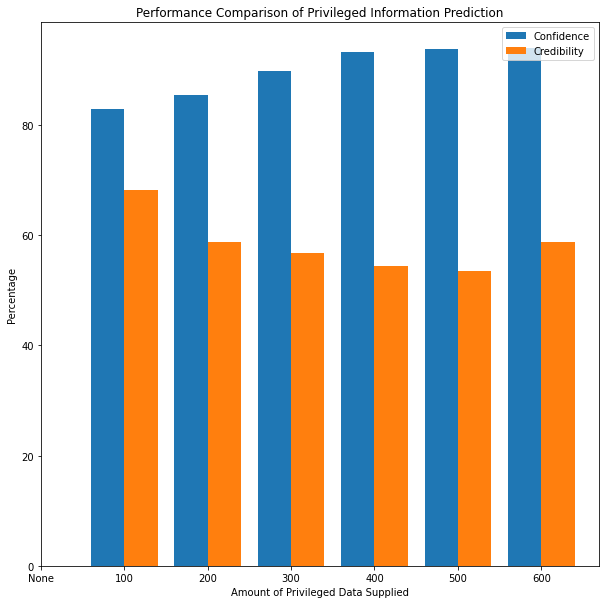

In [108]:
Xlab = labels
Ylab = co_h
Zlab = cr_h
plt.figure(figsize=(10,10))
  
X_axis = np.arange(len(Xlab))
  
plt.bar(X_axis - 0.2, Ylab, 0.4, label = 'Confidence')
plt.bar(X_axis + 0.2, Zlab, 0.4, label = 'Credibility')
  
plt.xticks(X_axis, Xlab)
plt.xlabel("Amount of Privileged Data Supplied")
plt.ylabel("Percentage")
plt.title("Performance Comparison of Privileged Information Prediction")
plt.legend()
plt.show()

## Performance of Output Label Prediction

In [109]:
comp_conf_y = [np.mean(i.confidence_y) for i in allNNs]

In [110]:
co_y = [i*100 for i in comp_conf_y]
co_y

[99.70315296640368,
 82.54364089775558,
 90.02493765586036,
 92.01995012468826,
 92.01995012468826,
 95.76059850374068,
 95.01246882793022]

In [111]:
comp_cred_y = [np.mean(i.credibility_y) for i in allNNs]

In [112]:
cr_y = [i*100 for i in comp_cred_y]
cr_y

[47.109123224084435, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

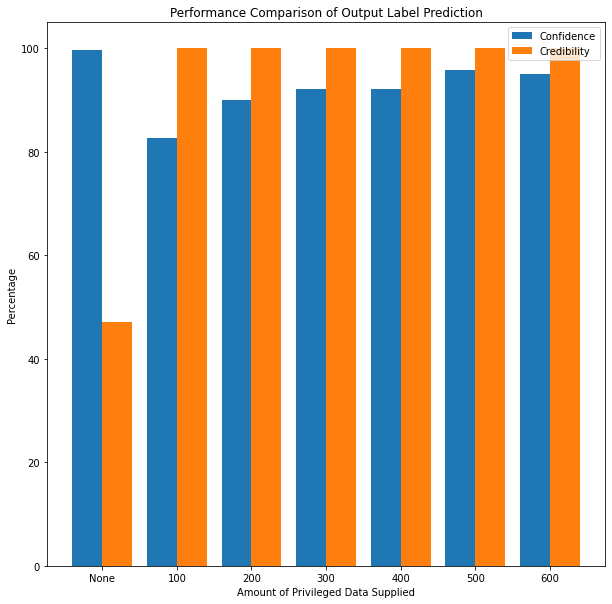

In [113]:
Xlab = labels
Ylab = co_y
Zlab = cr_y
plt.figure(figsize=(10,10))
  
X_axis = np.arange(len(Xlab))
  
plt.bar(X_axis - 0.2, Ylab, 0.4, label = 'Confidence')
plt.bar(X_axis + 0.2, Zlab, 0.4, label = 'Credibility')
  
plt.xticks(X_axis, Xlab)
plt.xlabel("Amount of Privileged Data Supplied")
plt.ylabel("Percentage")
plt.title("Performance Comparison of Output Label Prediction")
plt.legend()
plt.show()

# Choosing PI

In [114]:
len(x_train_data_new)

11791

In [115]:
# Divide this into train, calibrate and test sets
x_choice_train = x_train_data_new[:300]
x_choice_cal = x_train_data_new[300:400]
x_choice_test = x_train_data_new[400:1000]

In [116]:
y_choice_train = y_train_data[:300]
y_choice_cal = y_train_data[300:400]
y_choice_test = y_train_data[400:1000]

In [117]:
len(x_choice_train)

300

In [118]:
len(x_choice_cal)

100

In [119]:
len(x_choice_test)

600

In [120]:
nnChoice = myNN(2)

In [121]:
nnChoice.train_model(x_choice_train, y_choice_train, 5)

Epoch 1/5
10/10 [==============================] - 0s 9ms/step - loss: 81.8687 - accuracy: 0.5867
Epoch 2/5
10/10 [==============================] - 0s 16ms/step - loss: 0.4602 - accuracy: 0.7867
Epoch 3/5
10/10 [==============================] - 0s 17ms/step - loss: 0.1494 - accuracy: 0.9500
Epoch 4/5
10/10 [==============================] - 0s 16ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 5/5
10/10 [==============================] - 0s 16ms/step - loss: 0.0109 - accuracy: 0.9967
Model Trained !


In [122]:
nnChoice.eval_model(x_choice_cal, y_choice_cal)

Model Evaluation: 

4/4 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.9500


[0.28101563453674316, 0.949999988079071]

In [123]:
y_choice_pred_cal = nnChoice.pred_model(x_choice_cal)

In [124]:
y_choice_pred_test = nnChoice.pred_model(x_choice_test)

In [125]:
nnChoice.ncm_y, nnChoice.pVal_y = nnChoice.ICP(y_choice_pred_test, y_choice_pred_cal, y_choice_cal, [0,1])

In [126]:
nnChoice.confidence_y, nnChoice.credibility_y = nnChoice.calc_score(nnChoice.ncm_y, nnChoice.pVal_y)

# Function to train on varying metrics

In [127]:
def score_metric(nn, index_lst):
    #empty variables
    train_x = []
    train_h = []
    cal_x = []
    cal_h = []
    trLen = 1000
    
    # giving privileged data
    for i in range(0,trainLen):
        if i in index_lst:
            train_x.append(x_train_data_new[i])
            train_h.append(pi[i])
    
    count = 0
    for i in range(0, trLen):
        if i not in index_lst:
            if count <= 300:
                #get 600 train examples
                count += 1
                train_x.append(x_train_data_new[i])
                train_h.append(pi[i])
                
            else:
                #get 400 calibration examples
                cal_x.append(x_train_data_new[i])
                cal_h.append(pi[i]) 
    
    #preprocess data
    train_x_new = np.array(train_x)
    train_h_new = np.array(train_h)
    cal_x_new = np.array(cal_x)
    cal_h_new = np.array(cal_h)
    
    train_h_new = encode_it(train_h_new)
    cal_h_new = encode_it(cal_h_new)
    
    #predict rest of the additional info    
    nn.train_model(train_x_new[:300], train_h_new[:300],5)
    nn.eval_model(train_x_new[300:], train_h_new[300:])
    
    train_pred_h = nn.pred_model(train_x_new[300:])
    train_label_h = nn.get_h_labels(train_pred_h)
    
    train_pred_h_new = [y for x in [train_h[:300], train_label_h] for y in x]
    train_pred_h_new = encode_it(train_pred_h_new)
    
    # train with all data now
    nn.train_model(train_x_new, train_pred_h_new, 5) 
    nn.eval_model(cal_x_new, cal_h_new) 
    
    #predict labels
    cal_pred = nn.pred_model(cal_x_new)
    test_pred = nn.pred_model(x_test_data_new)
    
    #calculate metrics
    nn.ncm_h, nn.pVal_h = nn.ICP(test_pred, cal_pred, cal_h_new, [0,1,2,3,4])
    nn.confidence_h, nn.credibility_h = nn.calc_score(nn.ncm_h, nn.pVal_h)
    
    
            

## Highest NCM

In [128]:
preds_choice_ncm = [min(i) for i in nnChoice.ncm_y]

In [129]:
len(preds_choice_ncm)

600

In [130]:
num_units = 300

In [131]:
hgst_ncm_idx = sorted(range(len(preds_choice_ncm)), key = lambda sub: preds_choice_ncm[sub])[-num_units:]

In [132]:
len(hgst_ncm_idx)

300

In [133]:
nnHigh_ncm = myNN(5)

In [134]:
score_metric(nnHigh_ncm, hgst_ncm_idx)

Epoch 1/5
10/10 [==============================] - 1s 17ms/step - loss: 48.5963 - accuracy: 0.4200
Epoch 2/5
10/10 [==============================] - 0s 16ms/step - loss: 1.2191 - accuracy: 0.6033
Epoch 3/5
10/10 [==============================] - 0s 17ms/step - loss: 0.6850 - accuracy: 0.7733
Epoch 4/5
10/10 [==============================] - 0s 14ms/step - loss: 0.4612 - accuracy: 0.8533
Epoch 5/5
10/10 [==============================] - 0s 10ms/step - loss: 0.3243 - accuracy: 0.8900
Model Trained !
Model Evaluation: 

10/10 [==============================] - 0s 3ms/step - loss: 0.9947 - accuracy: 0.7342
Epoch 1/5
19/19 [==============================] - 1s 9ms/step - loss: 0.5195 - accuracy: 0.8486
Epoch 2/5
19/19 [==============================] - 0s 10ms/step - loss: 0.4283 - accuracy: 0.8502
Epoch 3/5
19/19 [==============================] - 0s 10ms/step - loss: 0.2742 - accuracy: 0.8985
Epoch 4/5
19/19 [==============================] - 0s 10ms/step - loss: 0.2182 - accuracy: 0.

In [135]:
np.mean(nnHigh_ncm.confidence_h)

0.9285007533902562

In [136]:
np.mean(nnHigh_ncm.credibility_h)

0.5588196885986942

## Lowest NCM

In [137]:
len(preds_choice_ncm)

600

In [138]:
num_units = 300

In [139]:
lwst_ncm_idx = sorted(range(len(preds_choice_ncm)), key = lambda sub: preds_choice_ncm[sub])[:num_units]

In [140]:
type(lwst_ncm_idx)

list

In [141]:
len(lwst_ncm_idx)

300

In [142]:
nnLow_ncm = myNN(5)

In [143]:
score_metric(nnLow_ncm, lwst_ncm_idx)

Epoch 1/5
10/10 [==============================] - 1s 11ms/step - loss: 47.1347 - accuracy: 0.4500
Epoch 2/5
10/10 [==============================] - 0s 12ms/step - loss: 0.9713 - accuracy: 0.6533
Epoch 3/5
10/10 [==============================] - 0s 12ms/step - loss: 0.7367 - accuracy: 0.6967
Epoch 4/5
10/10 [==============================] - 0s 13ms/step - loss: 0.6204 - accuracy: 0.7433
Epoch 5/5
10/10 [==============================] - ETA: 0s - loss: 0.4774 - accuracy: 0.80 - 0s 12ms/step - loss: 0.4804 - accuracy: 0.8033
Model Trained !
Model Evaluation: 

10/10 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.8106
Epoch 1/5
19/19 [==============================] - 1s 9ms/step - loss: 0.5120 - accuracy: 0.8170
Epoch 2/5
19/19 [==============================] - 0s 10ms/step - loss: 0.3714 - accuracy: 0.8602 0s - loss: 0.3366 - accuracy: 
Epoch 3/5
19/19 [==============================] - 0s 10ms/step - loss: 0.3776 - accuracy: 0.8619
Epoch 4/5
19/19 [===

In [144]:
np.mean(nnLow_ncm.confidence_h)

0.9238335007533902

In [145]:
np.mean(nnLow_ncm.credibility_h)

0.5381793068809643

## Low Credibility

In [146]:
preds_choice_cred = [min(i) for i in nnChoice.credibility_h]

In [147]:
lwst_cred_idx = sorted(range(len(preds_choice_cred)), key = lambda sub: preds_choice_cred[sub])[:num_units]

In [148]:
nnLow_cred = myNN(5)

In [149]:
score_metric(nnLow_cred, lwst_cred_idx)

Epoch 1/5
10/10 [==============================] - 0s 9ms/step - loss: 84.8992 - accuracy: 0.3067
Epoch 2/5
10/10 [==============================] - 0s 10ms/step - loss: 1.3565 - accuracy: 0.5333
Epoch 3/5
10/10 [==============================] - 0s 10ms/step - loss: 0.9170 - accuracy: 0.6867
Epoch 4/5
10/10 [==============================] - 0s 10ms/step - loss: 0.6079 - accuracy: 0.7667
Epoch 5/5
10/10 [==============================] - 0s 10ms/step - loss: 0.5133 - accuracy: 0.8067
Model Trained !
Model Evaluation: 

1/1 [==============================] - 0s 117ms/step - loss: 0.0583 - accuracy: 1.0000
Epoch 1/5
10/10 [==============================] - 0s 10ms/step - loss: 0.5949 - accuracy: 0.8106
Epoch 2/5
10/10 [==============================] - 0s 10ms/step - loss: 0.5450 - accuracy: 0.7774
Epoch 3/5
10/10 [==============================] - 0s 10ms/step - loss: 0.4080 - accuracy: 0.8505
Epoch 4/5
10/10 [==============================] - 0s 10ms/step - loss: 0.2599 - accuracy: 0.

In [150]:
np.mean(nnLow_cred.confidence_h)

0.9179751739972734

In [151]:
np.mean(nnLow_cred.credibility_h)

0.6212987012987012

# Compare Results

In [152]:
all_Learning_Elem = [nn3, nnLow_ncm, nnHigh_ncm, nnLow_cred]

In [153]:
labels_LearningElem = ['Random', 'Lowest NCM', 'Highest NCM', 'Lowest Credibility']

In [154]:
conf_compare = [np.mean(nnt.confidence_h) for nnt in all_Learning_Elem]

In [155]:
conf_y = [i*100 for i in conf_compare]
conf_y

[89.71306039271485, 92.38335007533902, 92.85007533902562, 91.79751739972734]

In [156]:
cred_compare = [np.mean(nnt.credibility_h) for nnt in all_Learning_Elem]

In [157]:
cred_y = [i*100 for i in cred_compare]
cred_y

[56.67749260700585, 53.817930688096425, 55.881968859869424, 62.12987012987013]

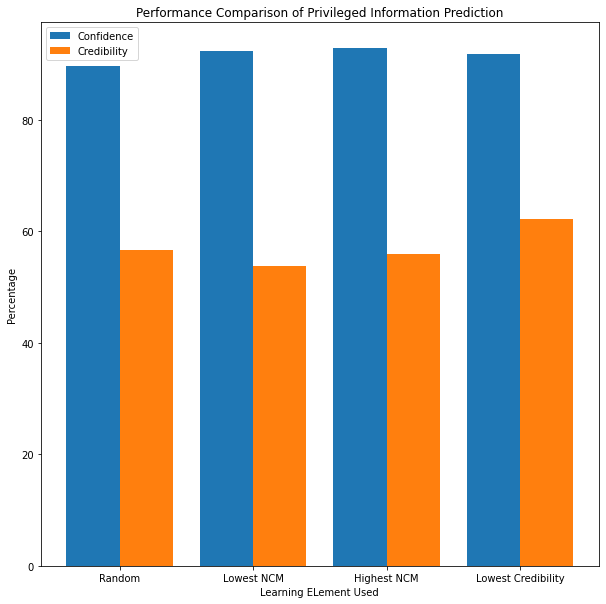

In [158]:
Xlab = labels_LearningElem
Ylab = conf_y
Zlab = cred_y
plt.figure(figsize=(10,10))
  
X_axis = np.arange(len(Xlab))
  
plt.bar(X_axis - 0.2, Ylab, 0.4, label = 'Confidence')
plt.bar(X_axis + 0.2, Zlab, 0.4, label = 'Credibility')
  
plt.xticks(X_axis, Xlab)
plt.xlabel("Learning ELement Used")
plt.ylabel("Percentage")
plt.title("Performance Comparison of Privileged Information Prediction")
plt.legend()
plt.show()

# Reports

In [159]:
nn0.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        14464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [160]:
nn1.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        14464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [161]:
nn2.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        14464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [162]:
nn3.model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        14464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [163]:
nn4.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        14464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_9 (Dense)              (None, 5)                

In [164]:
nn5.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        14464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [165]:
nn6.model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        14464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                